In [7]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout,Input,Flatten,Dense,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Data Augumentation
import matplotlib.pyplot as plt 
import numpy as np

In [8]:
train_datagen= ImageDataGenerator(rescale=1./255, rotation_range=0.2,shear_range=0.2,
    zoom_range=0.2,width_shift_range=0.2,
    height_shift_range=0.2, validation_split=0.2)


In [9]:
batchsize=8

In [10]:
train_data= train_datagen.flow_from_directory(r'D:\dataset\Prepared_Data\train',
                                target_size=(80,80),batch_size=batchsize,class_mode='categorical',subset='training' )

validation_data= train_datagen.flow_from_directory(r'D:\dataset\Prepared_Data\train',
                                target_size=(80,80),batch_size=batchsize,class_mode='categorical',subset='validation')

Found 64143 images belonging to 2 classes.
Found 16035 images belonging to 2 classes.


In [11]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(r'D:\dataset\Prepared_Data\test',
                                target_size=(80,80),batch_size=batchsize,class_mode='categorical')

Found 4720 images belonging to 2 classes.


In [12]:
bmodel = InceptionV3(include_top=False, weights='imagenet', input_tensor=Input(shape=(80,80,3)))
hmodel = bmodel.output

In [13]:
bmodel.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 80, 80, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 39, 39, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 39, 39, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 39, 39, 32)   0           ['batch_normalization[

In [14]:
hmodel = Flatten()(hmodel)
hmodel = Dense(64, activation='relu')(hmodel)
hmodel = Dropout(0.5)(hmodel)
hmodel = Dense(2,activation= 'softmax')(hmodel)

model = Model(inputs=bmodel.input, outputs= hmodel)
for layer in bmodel.layers:
    layer.trainable = False

Total params: 21,802,784
Trainable params: 21,768,352
Non-trainable params: 34,432
__________________________________________________________________________________________________


In [15]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 80, 80, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 39, 39, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 39, 39, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 39, 39, 32)   0           ['batch_normalization[0][0]']

In [16]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping, ReduceLROnPlateau

In [17]:
checkpoint = ModelCheckpoint(r'D:\dataset\model\cnnCat.h5',
                            monitor='val_loss',save_best_only=True,verbose=0)

earlystop = EarlyStopping(monitor = 'val_loss', patience=3, verbose= 3, restore_best_weights=True)

learning_rate = ReduceLROnPlateau(monitor= 'val_loss', patience=7, verbose= 3, )

callbacks=[checkpoint,earlystop,learning_rate]

In [ ]:
model.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit(train_data,steps_per_epoch=train_data.samples//batchsize,
                   validation_data=validation_data,
                   validation_steps=validation_data.samples//batchsize,
                   callbacks=callbacks,
                    epochs=50)

Epoch 1/50
8017/8017 [==============================] - 1414s 175ms/step - loss: 0.2069 - accuracy: 0.9184 - val_loss: 0.1967 - val_accuracy: 0.9172 - lr: 0.0010
Epoch 2/50
8017/8017 [==============================] - 468s 58ms/step - loss: 0.1785 - accuracy: 0.9295 - val_loss: 0.2000 - val_accuracy: 0.9145 - lr: 0.0010
Epoch 3/50
8017/8017 [==============================] - 472s 59ms/step - loss: 0.1714 - accuracy: 0.9344 - val_loss: 0.1870 - val_accuracy: 0.9233 - lr: 0.0010
Epoch 4/50
2799/8017 [=========>....................] - ETA: 5:36 - loss: 0.1664 - accuracy: 0.9369

In [16]:
acc_tr, loss_tr = model.evaluate(train_data)
print(acc_tr)
print(loss_tr)

8018/8018 [==============================] - 431s 54ms/step - loss: 0.1362 - accuracy: 0.9446
0.13621632754802704
0.9446081519126892


In [17]:
acc_vr, loss_vr = model.evaluate(validation_data)
print(acc_vr)
print(loss_vr)

2005/2005 [==============================] - 77s 38ms/step - loss: 0.1901 - accuracy: 0.9209
0.1901264637708664
0.9208605885505676


In [18]:
acc_test, loss_test = model.evaluate(test_data)
print(acc_tr)
print(loss_tr)

590/590 [==============================] - 51s 87ms/step - loss: 0.6101 - accuracy: 0.7972
0.13621632754802704
0.9446081519126892


In [19]:
import pandas as pd 
import os
import cv2


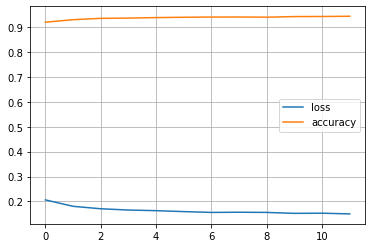

In [20]:
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.grid(True)
plt.legend()

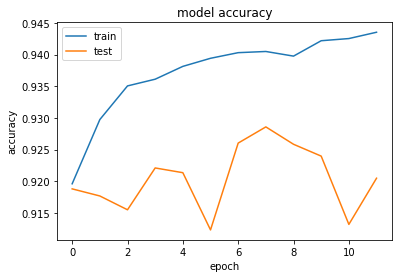

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

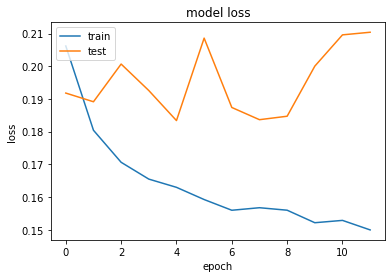

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()